In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [2]:
data = pd.read_csv('Combined_songs.csv')

In [3]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,MBTI
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,163448,4,ENFJ
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,218013,4,ENFJ
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,274693,4,ENFJ
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,208614,4,ENFJ
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,203587,4,ENFJ


In [4]:
X = data.drop(['MBTI'], axis=1)
y = data['MBTI']
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,163448,4
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,218013,4
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,274693,4
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,208614,4
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,203587,4


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
imbalanced = RandomForestClassifier()
imbalanced.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
imbalanced_preds = imbalanced.predict(X_test)

In [ ]:
classification_report(y_test, imbalanced_preds)

              precision    recall  f1-score   support

        ENFJ       0.06      0.06      0.06      2194
        ENFP       0.06      0.07      0.07      2384
        ENTJ       0.05      0.04      0.05      1714
        ENTP       0.04      0.03      0.03      1913
        ESFJ       0.03      0.03      0.03       759
        ESFP       0.03      0.03      0.03      1499
        ESTJ       0.02      0.01      0.01       822
        ESTP       0.11      0.16      0.13      2257
        INFJ       0.08      0.10      0.09      2248
        INFP       0.06      0.07      0.07      2473
        INTJ       0.10      0.11      0.10      2201
        INTP       0.03      0.03      0.03      1894
        ISFJ       0.03      0.02      0.03      1444
        ISFP       0.02      0.02      0.02      1701
        ISTJ       0.01      0.00      0.00      1165
        ISTP       0.02      0.02      0.02      1843

    accuracy                           0.06     28511
   macro avg       0.05   

In [22]:
weighted = RandomForestClassifier(class_weight='balanced')
weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [23]:
weighted_preds = weighted.predict(X_test)

In [ ]:
classification_report(y_test, weighted_preds)

              precision    recall  f1-score   support

        ENFJ       0.07      0.05      0.06      2194
        ENFP       0.09      0.06      0.07      2384
        ENTJ       0.07      0.06      0.06      1714
        ENTP       0.06      0.05      0.05      1913
        ESFJ       0.01      0.04      0.02       759
        ESFP       0.03      0.03      0.03      1499
        ESTJ       0.01      0.02      0.01       822
        ESTP       0.14      0.14      0.14      2257
        INFJ       0.10      0.10      0.10      2248
        INFP       0.08      0.06      0.07      2473
        INTJ       0.12      0.11      0.11      2201
        INTP       0.05      0.03      0.04      1894
        ISFJ       0.04      0.04      0.04      1444
        ISFP       0.03      0.02      0.03      1701
        ISTJ       0.01      0.02      0.01      1165
        ISTP       0.03      0.02      0.02      1843

    accuracy                           0.06     28511
   macro avg       0.06   

In [ ]:
# X_train_subset = X_train.sample(frac=0.1, random_state=5)
# y_train_subset = y_train[X_train_subset.index]

# param_distributions = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20]
# }

# search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distributions, scoring='f1_weighted', cv=5, verbose=2)
# search.fit(X_train_subset, y_train_subset)

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.5s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   5.5s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.3s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.6s
[CV] END ...................max_depth=None, n_estimators=200; total time=  11.0s
[CV] END ...................max_depth=None, n_estimators=300; total time=  16.9s
[CV] END ...................max_depth=None, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1_weighted', verbose=2)

In [ ]:
# search.best_params_

{'n_estimators': 300, 'max_depth': None}

In [ ]:
pleaseBeOptimized = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced')
pleaseBeOptimized.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300)

In [51]:
preds = pleaseBeOptimized.predict(X_test)

In [ ]:
classification_report(y_test, preds)

              precision    recall  f1-score   support

        ENFJ       0.08      0.01      0.02      2194
        ENFP       0.09      0.02      0.04      2384
        ENTJ       0.08      0.15      0.11      1714
        ENTP       0.07      0.04      0.05      1913
        ESFJ       0.04      0.11      0.05       759
        ESFP       0.08      0.28      0.13      1499
        ESTJ       0.04      0.11      0.06       822
        ESTP       0.14      0.10      0.11      2257
        INFJ       0.12      0.13      0.13      2248
        INFP       0.08      0.01      0.02      2473
        INTJ       0.13      0.20      0.16      2201
        INTP       0.07      0.02      0.03      1894
        ISFJ       0.08      0.21      0.12      1444
        ISFP       0.05      0.02      0.03      1701
        ISTJ       0.04      0.04      0.04      1165
        ISTP       0.05      0.01      0.01      1843

    accuracy                           0.09     28511
   macro avg       0.08   

In [9]:
def encode_mbti(mbti):
    return [
        'E' if mbti[0] == 'E' else 'I',
        'S' if mbti[1] == 'S' else 'N',
        'T' if mbti[2] == 'T' else 'F',
        'J' if mbti[3] == 'J' else 'P'
    ]

encoded_mbti = data['MBTI'].apply(encode_mbti)
encoded_mbti_df = pd.DataFrame(encoded_mbti.tolist(), columns=['E/I', 'S/N', 'T/F', 'J/P'])
encoded_data = pd.concat([data, encoded_mbti_df], axis=1)
encoded_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,MBTI,E/I,S/N,T/F,J/P
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,163448,4,ENFJ,E,N,F,J
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,218013,4,ENFJ,E,N,F,J
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,274693,4,ENFJ,E,N,F,J
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,208614,4,ENFJ,E,N,F,J
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,203587,4,ENFJ,E,N,F,J


In [ ]:
X = encoded_data.drop(['MBTI', 'E/I', 'S/N', 'T/F', 'J/P'], axis=1)
y = encoded_data[['E/I']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
different = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced')
different.fit(X_train, y_train)

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300)

In [60]:
preds = different.predict(X_test)

In [ ]:
classification_report(y_test, preds)

              precision    recall  f1-score   support

           E       0.55      0.63      0.59     13542
           I       0.62      0.54      0.58     14969

    accuracy                           0.58     28511
   macro avg       0.59      0.59      0.58     28511
weighted avg       0.59      0.58      0.58     28511



In [ ]:
X = encoded_data.drop(['MBTI', 'E/I', 'S/N', 'T/F', 'J/P'], axis=1)
Y = encoded_data[['S/N']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
different = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced')
different.fit(X_train, y_train)

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [ ]:
preds = different.predict(X_test)

In [ ]:
classification_report(y_test, preds)

              precision    recall  f1-score   support

           N       0.60      0.67      0.63     17021
           S       0.41      0.34      0.37     11490

    accuracy                           0.53     28511
   macro avg       0.50      0.50      0.50     28511
weighted avg       0.52      0.53      0.53     28511



In [ ]:
Y = encoded_data[['T/F']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
different = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced')
different.fit(X_train, y_train)

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [ ]:
preds = different.predict(X_test)

In [ ]:
classification_report(y_test, preds)

              precision    recall  f1-score   support

           F       0.57      0.56      0.57     14702
           T       0.54      0.55      0.55     13809

    accuracy                           0.56     28511
   macro avg       0.56      0.56      0.56     28511
weighted avg       0.56      0.56      0.56     28511



In [ ]:
Y = encoded_data[['J/P']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
different = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced')
different.fit(X_train, y_train)

c:\Users\alexz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [ ]:
preds = different.predict(X_test)

In [ ]:
classification_report(y_test, preds)

              precision    recall  f1-score   support

           J       0.42      0.38      0.40     12547
           P       0.55      0.59      0.57     15964

    accuracy                           0.50     28511
   macro avg       0.48      0.48      0.48     28511
weighted avg       0.49      0.50      0.49     28511



In [ ]:
X_train_subset = X_train.sample(frac=0.1, random_state=5)
y_train_subset = y_train.loc[X_train_subset.index].values.ravel()

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6]
}

search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distributions, scoring='f1_weighted', cv=5, verbose=2)
search.fit(X_train_subset, y_train_subset)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_split=6, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=6, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=6, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=6, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_split=6, n_estimators=100; total time=   2.1s
[CV] END max_depth=None, min_samples_split=4, n_estimators=200; total time=   8.1s
[CV] END max_depth=None, min_samples_split=4, n_estimators=200; total time=   8.1s
[CV] END max_depth=None, min_samples_split=4, n_estimators=200; total time=   7.8s
[CV] END max_depth=None, min_samples_split=4, n_estimators=200; total time=   8.1s
[CV] END max_depth=None, min_samples_split=4, n_estimators=200; total time=   9.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END max_depth=None, min_samples

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1_weighted', verbose=2)

In [20]:
search.best_params_

{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': None}

In [ ]:
different = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, class_weight='balanced')
different.fit(X_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [ ]:
preds = different.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           J       0.42      0.38      0.40     12547
           P       0.55      0.59      0.57     15964

    accuracy                           0.50     28511
   macro avg       0.48      0.48      0.48     28511
weighted avg       0.49      0.50      0.49     28511



In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())

xgboost = XGBClassifier()
xgboost.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgboost.predict(X_test)
classification_report(y_test_encoded, preds)

              precision    recall  f1-score   support

           0       0.45      0.21      0.28     12547
           1       0.56      0.80      0.66     15964

    accuracy                           0.54     28511
   macro avg       0.50      0.50      0.47     28511
weighted avg       0.51      0.54      0.49     28511



In [ ]:
# try xgboost with the 16 MBTI classes/tune scale_pos_weight

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train_subset = X_train.sample(frac=0.1, random_state=5)
y_train_subset = y_train.loc[X_train_subset.index].values.ravel()

In [6]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())
y_train_subset_encoded = label_encoder.transform(y_train_subset)

In [12]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
preds = xgboost.predict(X_test)
print(classification_report(y_test_encoded, preds))

              precision    recall  f1-score   support

           0       0.06      0.07      0.07      2194
           1       0.09      0.13      0.11      2384
           2       0.07      0.08      0.07      1714
           3       0.07      0.05      0.06      1913
           4       0.09      0.01      0.02       759
           5       0.08      0.06      0.07      1499
           6       0.07      0.01      0.02       822
           7       0.11      0.22      0.15      2257
           8       0.10      0.19      0.13      2248
           9       0.09      0.13      0.11      2473
          10       0.12      0.14      0.13      2201
          11       0.05      0.03      0.03      1894
          12       0.06      0.03      0.04      1444
          13       0.04      0.02      0.02      1701
          14       0.04      0.01      0.01      1165
          15       0.06      0.02      0.03      1843

    accuracy                           0.09     28511
   macro avg       0.08   

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

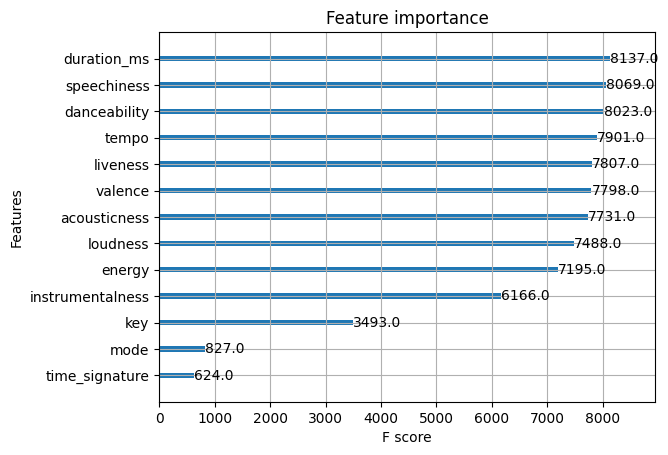

In [14]:
xgb.plot_importance(xgboost)